In [2]:
!pip install pandas datetime datasets nltk

import numpy as np
import pandas as pd
import datetime
import datasets
from datasets import load_dataset
dataset = load_dataset("go_emotions","simplified")
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

import re
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
from sklearn.preprocessing import MultiLabelBinarizer
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-300")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 25.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[==================================================] 100.0% 376.1/376.1MB downloaded


In [3]:
data_frame = pd.concat([pd.DataFrame.from_dict(dataset['train']), pd.DataFrame.from_dict(dataset['test']), pd.DataFrame.from_dict(dataset['validation'])])

In [4]:
emotion_map = {
    0 : "admiration",
    1 : "amusement",
    2 : "anger",
    3 : "annoyance",
    4 : "approval",
    5 : "caring",
    6 : "confusion",
    7 : "curiosity",
    8 : "desire",
    9 : "disappointment",
    10 : "disapproval",
    11 : "disgust",
    12 : "embarrassment",
    13 : "excitement",
    14 : "fear",
    15 : "gratitude",
    16 : "grief",
    17 : "joy",
    18 : "love",
    19 : "nervousness",
    20 : "optimism",
    21 : "pride",
    22 : "realization",
    23 : "relief",
    24 : "remorse",
    25 : "sadness",
    26 : "surprise",
    27 : "neutral",
}
data_frame['labels'] = data_frame['labels'].apply(lambda x: [emotion_map.get(l, 'neutral') for l in x] if isinstance(x, (list)) else original_emotion_map.get(x, 'neutral'))
data_frame.head(10)


,text,labels,id
0,My favourite food is anything I didn't have to...,[neutral],eebbqej
1,"Now if he does off himself, everyone will thin...",[neutral],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[anger],eezlygj
3,To make her feel threatened,[fear],ed7ypvh
4,Dirty Southern Wankers,[annoyance],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[surprise],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[gratitude],ee3b6wu
7,We need more boards and to create a bit more s...,"[desire, optimism]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[admiration],ed8wbdn
9,It might be linked to the trust factor of your...,[neutral],eczgv1o


<ipython-input-5-c6eaf7d91ba8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


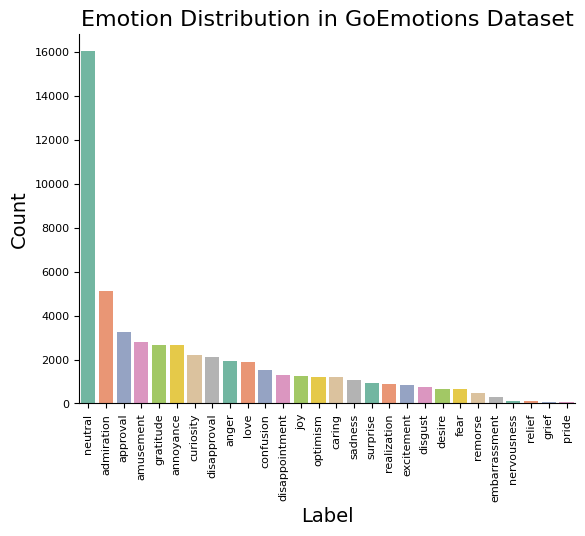

,text,labels,id
0,My favourite food is anything I didn't have to...,[neutral],eebbqej
1,"Now if he does off himself, everyone will thin...",[neutral],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[anger],eezlygj
3,To make her feel threatened,[fear],ed7ypvh
4,Dirty Southern Wankers,[annoyance],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[surprise],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[gratitude],ee3b6wu
7,We need more boards and to create a bit more s...,"[desire, optimism]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[admiration],ed8wbdn
9,It might be linked to the trust factor of your...,[neutral],eczgv1o


In [5]:
data_frame['new_labels'] = data_frame['labels'].apply(lambda x: x[0])
label_counts = data_frame['new_labels'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title('Emotion Distribution in GoEmotions Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.xticks(rotation=90)
plt.show()
data_frame = data_frame.drop('new_labels',axis=1)
data_frame.head(10)

In [6]:
emotion_dict = {
    "admiration": 0,
    "approval": 0,
    "pride": 0,
    "optimism": 0,
    "joy" : 1,
    "amusement": 1,
    "excitement": 1,
    "surprise": 1,
    "anger": 2,
    "annoyance": 2,
    "love": 3,
    "caring": 3,
    "confusion": 4,
    "realization": 4,
    "curiosity": 5,
    "desire": 6,
    "disappointment": 7,
    "sadness": 7,
    "remorse": 7,
    "disapproval": 8,
    "disgust": 8,
    "embarrassment": 9,
    "fear": 10,
    "nervousness": 10,
    "gratitude": 11,
    "relief": 11,
    "grief": 12,
    "neutral": 13
}

data_frame['labels'] = data_frame['labels'].apply(lambda x: [emotion_dict[emotion] for emotion in x])
data_frame.head(10)

,text,labels,id
0,My favourite food is anything I didn't have to...,[13],eebbqej
1,"Now if he does off himself, everyone will thin...",[13],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[10],ed7ypvh
4,Dirty Southern Wankers,[2],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[1],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[11],ee3b6wu
7,We need more boards and to create a bit more s...,"[6, 0]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn
9,It might be linked to the trust factor of your...,[13],eczgv1o


<ipython-input-7-c2c0ef26b2cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


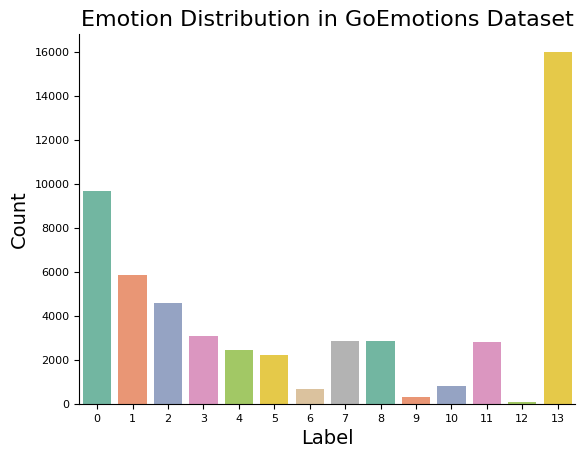

,text,labels,id
0,My favourite food is anything I didn't have to...,[13],eebbqej
1,"Now if he does off himself, everyone will thin...",[13],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[10],ed7ypvh
4,Dirty Southern Wankers,[2],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[1],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[11],ee3b6wu
7,We need more boards and to create a bit more s...,"[6, 0]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn
9,It might be linked to the trust factor of your...,[13],eczgv1o


In [7]:

data_frame['new_labels'] = data_frame['labels'].apply(lambda x: x[0])
label_counts = data_frame['new_labels'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title('Emotion Distribution in GoEmotions Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.show()
data_frame = data_frame.drop('new_labels',axis=1)
data_frame.head(10)

In [8]:

def preprocessed_text(text):
    if pd.isnull(text) :
      return ' '
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    lemmatize = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatize)
data_frame['text'] = data_frame['text'].apply(preprocessed_text)
data_frame.head(10)


,text,labels,id
0,favourite food anything didnt cook,[13],eebbqej
1,everyone think he laugh screwing people instea...,[13],ed00q6i
2,fuck bayless isoing,[2],eezlygj
3,make feel threatened,[10],ed7ypvh
4,dirty southern wanker,[2],ed0bdzj
5,omg peyton isnt good enough help u playoff dum...,[1],edvnz26
6,yes heard abt f bomb thanks reply hubby anxiou...,[11],ee3b6wu
7,need board create bit space name well good,"[6, 0]",ef4qmod
8,damn youtube outrage drama super lucrative reddit,[0],ed8wbdn
9,might linked trust factor friend,[13],eczgv1o


In [9]:
# One-hot encoding the labels
mlb = MultiLabelBinarizer()
one_hot_labels = mlb.fit_transform(data_frame['labels'])
labels_df = pd.DataFrame(one_hot_labels, columns=mlb.classes_)


# Concatenating the original DataFrame and one-hot encoded labels DataFrame
data_frame = pd.concat([data_frame.reset_index(drop=True), labels_df], axis=1)


# Dropping the original labels column
data_frame = data_frame.drop('labels', axis=1)


print(data_frame.head(10))


                                                text       id  0  1  2  3  4  \
0                 favourite food anything didnt cook  eebbqej  0  0  0  0  0   
1  everyone think he laugh screwing people instea...  ed00q6i  0  0  0  0  0   
2                                fuck bayless isoing  eezlygj  0  0  1  0  0   
3                               make feel threatened  ed7ypvh  0  0  0  0  0   
4                              dirty southern wanker  ed0bdzj  0  0  1  0  0   
5  omg peyton isnt good enough help u playoff dum...  edvnz26  0  1  0  0  0   
6  yes heard abt f bomb thanks reply hubby anxiou...  ee3b6wu  0  0  0  0  0   
7         need board create bit space name well good  ef4qmod  1  0  0  0  0   
8  damn youtube outrage drama super lucrative reddit  ed8wbdn  1  0  0  0  0   
9                   might linked trust factor friend  eczgv1o  0  0  0  0  0   

   5  6  7  8  9  10  11  12  13  
0  0  0  0  0  0   0   0   0   1  
1  0  0  0  0  0   0   0   0   1  
2  0  0  0  0 

In [10]:
def vectorize_text(text):
    vectors = []
    for token in text:
        try:
            vector = glove_model[token]
            vectors.append(vector)
        except KeyError:
            pass
    return vectors



# Apply the vectorize_text function to the text column
data_frame['vector'] = data_frame['text'].apply(lambda x: vectorize_text(x))

# Print the first 10 rows of the data frame
print(data_frame.head(10))

                                                text       id  0  1  2  3  4  \
0                 favourite food anything didnt cook  eebbqej  0  0  0  0  0   
1  everyone think he laugh screwing people instea...  ed00q6i  0  0  0  0  0   
2                                fuck bayless isoing  eezlygj  0  0  1  0  0   
3                               make feel threatened  ed7ypvh  0  0  0  0  0   
4                              dirty southern wanker  ed0bdzj  0  0  1  0  0   
5  omg peyton isnt good enough help u playoff dum...  edvnz26  0  1  0  0  0   
6  yes heard abt f bomb thanks reply hubby anxiou...  ee3b6wu  0  0  0  0  0   
7         need board create bit space name well good  ef4qmod  1  0  0  0  0   
8  damn youtube outrage drama super lucrative reddit  ed8wbdn  1  0  0  0  0   
9                   might linked trust factor friend  eczgv1o  0  0  0  0  0   

   5  6  7  8  9  10  11  12  13  \
0  0  0  0  0  0   0   0   0   1   
1  0  0  0  0  0   0   0   0   1   
2  0  0  0 

In [11]:
X = pad_sequences(data_frame['vector'], maxlen=30, padding='post', truncating='post')
y = data_frame.iloc[:, 2:-1]

# Split the data into training and testing sets with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:

print("Training data shape:", X_train.shape, y_train.shape)

print("Testing data shape:", X_test.shape, y_test.shape)
#print(y)

Training data shape: (43410, 30, 300) (43410, 14)
Testing data shape: (10853, 30, 300) (10853, 14)


In [13]:

embedding_dim = 300
hidden_size = 64
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Bidirectional(LSTM(hidden_size, return_sequences=False), input_shape=(sequence_length, embedding_dim)))
model.add(Dropout(0.1))
model.add(Dense(130, activation='softmax'))
model.add(Dense(num_classes, activation='relu'))


model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.2734 - loss: 0.5145 - val_accuracy: 0.3029 - val_loss: 0.4398
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3036 - loss: 0.4426 - val_accuracy: 0.3236 - val_loss: 0.4358
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.3111 - loss: 0.4382 - val_accuracy: 0.3551 - val_loss: 0.3719
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.3602 - loss: 0.3717 - val_accuracy: 0.3820 - val_loss: 0.3665
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.3789 - loss: 0.3710 - val_accuracy: 0.3928 - val_loss: 0.3660
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.4029 - loss: 0.3641 - val_accuracy: 0.4048 - val_loss: 0.3606
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.4156 - loss: 0.3646 - val_accuracy: 0.4203 - val_loss: 0.3575
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.4241 - loss

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))


340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4409 - loss: 0.3526
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.69      0.26      0.38      2097
           1       0.71      0.38      0.50      1297
           2       0.87      0.04      0.08       986
           3       1.00      0.00      0.00       775
           4       1.00      0.00      0.00       568
           5       1.00      0.00      0.00       520
           6       0.80      0.10      0.18       158
           7       0.75      0.15      0.26       742
           8       1.00      0.00      0.00       698
           9       1.00      0.00      0.00        76
          10       1.00      0.00      0.00       180
          11       0.96      0.68      0.80       694
          12       1.00      0.00      0.00        30
          13       0.60      0.18      0.27      3581

   micro avg       0.71      0.19      0.30     12402
   macro avg      

In [16]:

# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[1799   97    2    0    0    0    3    9    0    0    0   72    0  115]
 [ 659  447    2    0    0    0    0    4    0    0    0   26    0   34]
 [ 791   14   40    0    0    0    0    4    0    0    0    9    0   85]
 [ 547   18    0    0    0    0    2    8    0    0    0   14    0   34]
 [ 384    8    0    0    0    0    0    7    0    0    0    5    0   53]
 [ 324    5    0    0    0    0    0    8    0    0    0    5    0   53]
 [  79    6    0    0    0    0   13    2    0    0    0    2    0    9]
 [ 443   14    1    0    0    0    0   95    0    0    0    5    0   34]
 [ 471   12    0    0    0    0    0    2    0    0    0    2    0   38]
 [  50    2    0    0    0    0    0    2    0    0    0    0    0    3]
 [ 126    5    1    0    0    0    0    0    0    0    0    0    0   16]
 [ 126   14    0    0    0    0    0    1    0    0    0  347    0    2]
 [  13    0    0    0    0    0    0    2    0    0    0    0    0    0]
 [2568   58    1    0    0    0  

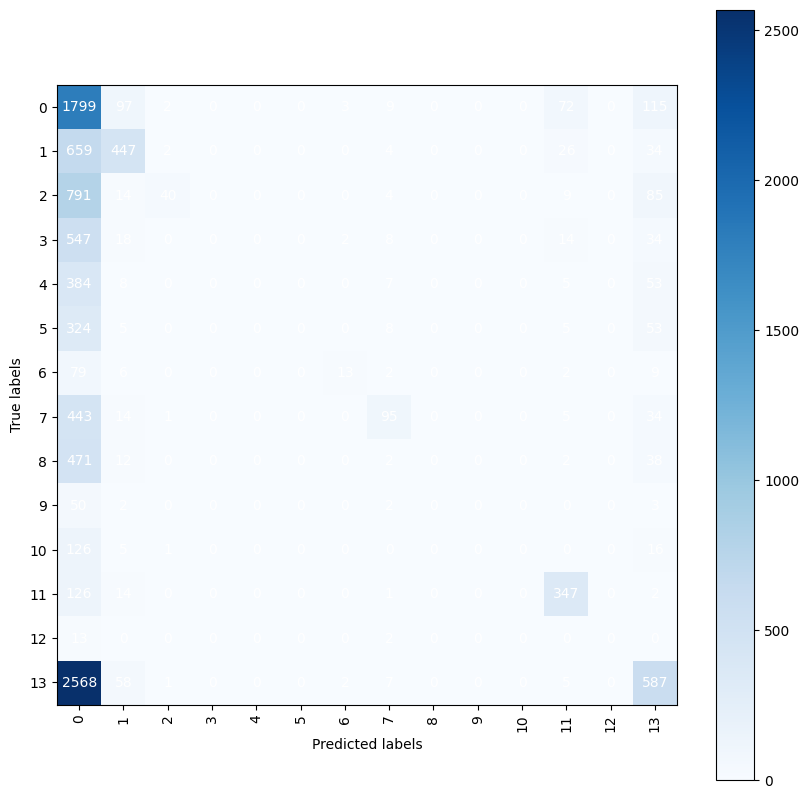

In [17]:


# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()


In [18]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

embedding_dim = 300
hidden_size = 64
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(sequence_length, embedding_dim)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='softmax'))
model.add(Dense(num_classes, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.1115 - loss: 12.3921 - val_accuracy: 0.1080 - val_loss: 12.3940
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1138 - loss: 12.4507 - val_accuracy: 0.1196 - val_loss: 12.3762
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1238 - loss: 12.3966 - val_accuracy: 0.1312 - val_loss: 12.3401
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.1343 - loss: 12.4351 - val_accuracy: 0.1462 - val_loss: 12.3260
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.2928 - loss: 7.9093 - val_accuracy: 0.3382 - val_loss: 7.4912
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3393 - loss: 7.5739 - val_accuracy: 0.3545 - val_loss: 7.4872
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.3517 - loss: 7.5408 - val_accuracy: 0.3612 - val_loss: 7.4424
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3580 -

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3695 - loss: 7.4883
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2097
           1       0.67      0.45      0.54      1297
           2       1.00      0.00      0.00       986
           3       0.76      0.45      0.57       775
           4       1.00      0.00      0.00       568
           5       1.00      0.00      0.00       520
           6       1.00      0.00      0.00       158
           7       0.68      0.07      0.13       742
           8       1.00      0.00      0.00       698
           9       1.00      0.00      0.00        76
          10       1.00      0.00      0.00       180
          11       1.00      0.00      0.00       694
          12       1.00      0.00      0.00        30
          13       0.37      0.95      0.53      3581

   micro avg       0.41      0.35      0.38     12402
   macro avg      

In [21]:

# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[  37  130    0   69    0    0    0    8    0    0    0    0    0 1853]
 [  40  527    0   35    0    0    0    1    0    0    0    0    0  569]
 [   9   21    0   12    0    0    0    4    0    0    0    0    0  897]
 [  11   15    0  293    0    0    0    1    0    0    0    0    0  303]
 [   5   10    0    3    0    0    0    5    0    0    0    0    0  434]
 [   7   15    0    5    0    0    0    2    0    0    0    0    0  366]
 [   6    8    0    3    0    0    0    1    0    0    0    0    0   93]
 [  10   19    0    2    0    0    0   44    0    0    0    0    0  517]
 [   8   14    0    3    0    0    0    1    0    0    0    0    0  499]
 [   1    1    0    2    0    0    0    0    0    0    0    0    0   53]
 [   4    6    0    1    0    0    0    1    0    0    0    0    0  136]
 [   5   34    0    4    0    0    0    2    0    0    0    0    0  445]
 [   0    0    0    0    0    0    0    2    0    0    0    0    0   13]
 [  43   69    0   30    0    0  

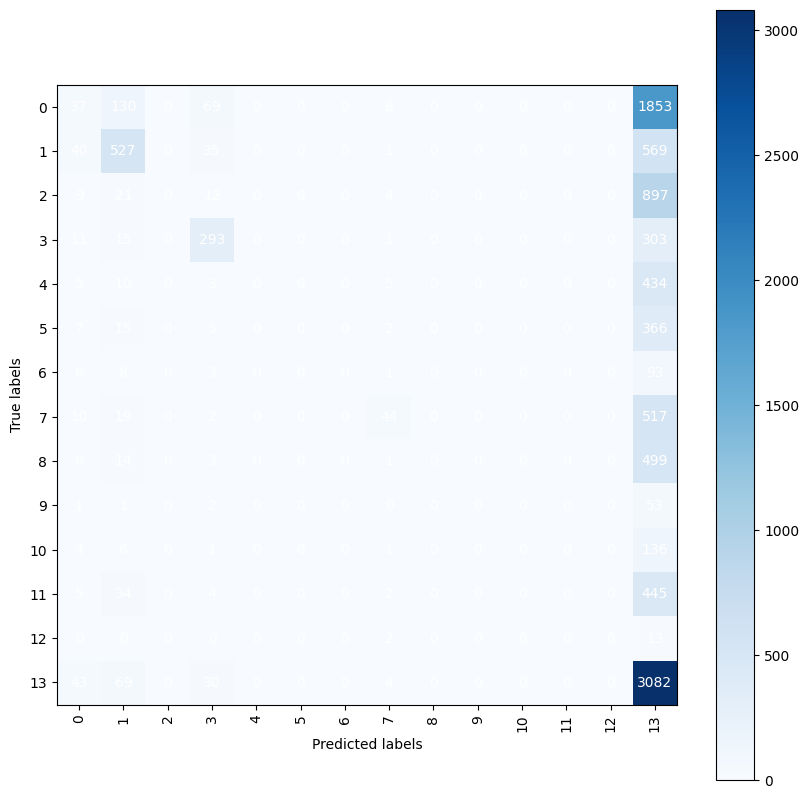

In [22]:
# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()


In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

embedding_dim = 300
hidden_size = 64
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(GRU(hidden_size, input_shape=(sequence_length, embedding_dim)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='softmax'))
model.add(Dense(num_classes, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.0883 - loss: 14.7399 - val_accuracy: 0.2093 - val_loss: 12.5242
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.2513 - loss: 10.1153 - val_accuracy: 0.3129 - val_loss: 7.0362
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3130 - loss: 7.1455 - val_accuracy: 0.3212 - val_loss: 7.0201
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3194 - loss: 7.1095 - val_accuracy: 0.3239 - val_loss: 7.0117
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3173 - loss: 7.0858 - val_accuracy: 0.3241 - val_loss: 7.0108
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.3188 - loss: 7.0762 - val_accuracy: 0.3253 - val_loss: 7.0055
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.3218 - loss: 7.1243 - val_accuracy: 0.3409 - val_loss: 6.9899
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.3416 - loss

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3859 - loss: 6.9150
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.41      0.43      0.42      2097
           1       1.00      0.00      0.00      1297
           2       1.00      0.00      0.00       986
           3       0.67      0.53      0.59       775
           4       1.00      0.00      0.00       568
           5       1.00      0.00      0.00       520
           6       1.00      0.00      0.00       158
           7       0.61      0.14      0.22       742
           8       1.00      0.00      0.00       698
           9       1.00      0.00      0.00        76
          10       1.00      0.00      0.00       180
          11       1.00      0.00      0.00       694
          12       1.00      0.00      0.00        30
          13       0.38      0.95      0.54      3581

   micro avg       0.40      0.39      0.39     12402
   macro avg      

In [26]:

# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[ 920    0    0   69    0    0    0   16    0    0    0    0    0 1092]
 [ 262    0    0   44    0    0    0   11    0    0    0    0    0  855]
 [ 121    0    0   13    0    0    0    4    0    0    0    0    0  805]
 [ 114    0    0  315    0    0    0    9    0    0    0    0    0  185]
 [  50    0    0    5    0    0    0    8    0    0    0    0    0  394]
 [  37    0    0    5    0    0    0    8    0    0    0    0    0  345]
 [  20    0    0    3    0    0    0    1    0    0    0    0    0   87]
 [  90    0    0    2    0    0    0   85    0    0    0    0    0  415]
 [  91    0    0    5    0    0    0    4    0    0    0    0    0  425]
 [   7    0    0    2    0    0    0    3    0    0    0    0    0   45]
 [  27    0    0    1    0    0    0    4    0    0    0    0    0  116]
 [ 128    0    0    4    0    0    0    2    0    0    0    0    0  356]
 [   2    0    0    0    0    0    0    3    0    0    0    0    0   10]
 [ 398    0    0   35    0    0  

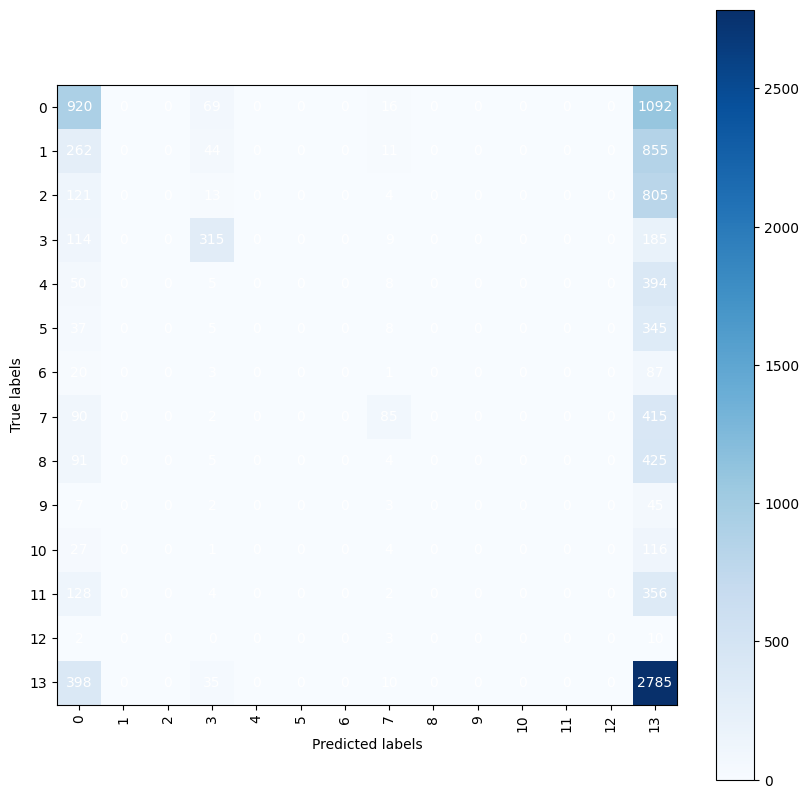

In [27]:


# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()


In [28]:

embedding_dim = 300
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=(sequence_length, embedding_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Add an additional Conv1D layer with 32 filters and a kernel size of 3
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.2994 - loss: 0.2542 - val_accuracy: 0.3746 - val_loss: 0.2207
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3885 - loss: 0.2205 - val_accuracy: 0.4382 - val_loss: 0.2104
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4320 - loss: 0.2104 - val_accuracy: 0.4498 - val_loss: 0.2071
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4500 - loss: 0.2056 - val_accuracy: 0.4541 - val_loss: 0.2039
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4591 - loss: 0.2035 - val_accuracy: 0.4649 - val_loss: 0.2016
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4661 - loss: 0.2007 - val_accuracy: 0.4714 - val_loss: 0.1994
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4774 - loss: 0.1974 - val_accuracy: 0.4726 - val_loss: 0.1986
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4744 - loss: 0.19

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4789 - loss: 0.1968
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.26      0.38      2097
           1       0.69      0.46      0.55      1297
           2       0.74      0.12      0.20       986
           3       0.76      0.42      0.54       775
           4       1.00      0.01      0.01       568
           5       1.00      0.02      0.03       520
           6       0.69      0.14      0.23       158
           7       0.73      0.16      0.26       742
           8       1.00      0.00      0.00       698
           9       1.00      0.00      0.00        76
          10       0.74      0.13      0.22       180
          11       0.95      0.68      0.79       694
          12       1.00      0.00      0.00        30
          13       0.57      0.33      0.42      3581

   micro avg       0.68      0.27      0.39     12402
   macro avg      

In [30]:
# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[1608  100    5   56    0    0    4   12    0    0    0   62    0  250]
 [ 477  540    7   26    0    0    1    4    0    0    0   17    0  100]
 [ 633   16  113    9    0    0    2    6    0    0    2    8    0  154]
 [ 268   17    0  268    0    0    1    6    0    0    1    6    0   56]
 [ 311   13    1    4    3    1    0    8    0    0    2    4    0  110]
 [ 240   18    2    4    0    7    0    9    0    0    2    3    0  110]
 [  72    6    0    3    0    0   16    2    0    0    0    1    0   11]
 [ 390   14    6    1    0    0    1   95    0    0    1    5    0   79]
 [ 414   14    5    3    0    0    0    4    0    0    0    3    0   82]
 [  47    3    0    2    0    0    0    2    0    0    0    0    0    3]
 [ 106    5    1    1    0    0    0    0    0    0   22    0    0   13]
 [ 123   16    0    3    0    0    0    2    0    0    0  332    0   14]
 [   6    0    0    0    0    0    0    2    0    0    0    0    0    7]
 [1988   79   13   30    0    0  

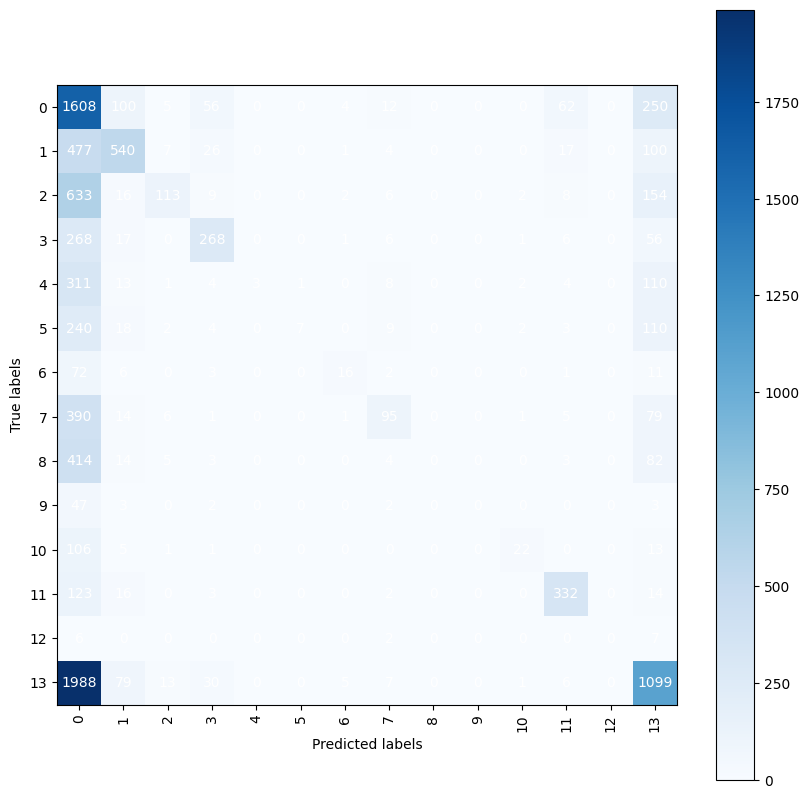

In [31]:
# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()

In [32]:
# Sample sentence to test
sample_sentence = "I feel so happy and excited about this event!"

# 1. Preprocess the sample sentence
processed_text = preprocessed_text(sample_sentence)
print("Processed Text:", processed_text)

# 2. Vectorize the sample sentence
sample_vector = vectorize_text(processed_text)
sample_vector = pad_sequences([sample_vector], maxlen=30, padding='post', truncating='post')
print("Vectorized Text Shape:", sample_vector.shape)

# 3. Get model prediction
y_pred_sample = model.predict(sample_vector)

# Print the raw prediction probabilities
print("Prediction Probabilities:", y_pred_sample)

# Change the threshold from 0.5 to a lower value (e.g., 0.3) to capture more emotions
y_pred_labels = (y_pred_sample > 0.3).astype(int)  # Lowering the threshold

# Display the predicted labels
predicted_emotions = mlb.inverse_transform(y_pred_labels)

# Display the predicted emotions
print("Predicted Emotions:", predicted_emotions)

emotion_dict = {
    0: "admiration",
    0: "approval",
    0: "pride",
    0: "optimism",
    1: "joy",
    1: "amusement",
    1: "excitement",
    1: "surprise",
    2: "anger",
    2: "annoyance",
    3: "love",
    3: "caring",
    4: "confusion",
    4: "realization",
    5:"curiosity",
    6:"desire",
    7:"disappointment",
    7:"sadness",
    7:"remorse",
    8:"disapproval",
    8:"disgust",
    9:"embarrassment",
    10:"fear",
    10:"nervousness",
    11:"gratitude",
    11:"relief",
    12:"grief",
    13:"neutral"
}

# Convert the predicted labels into emotion names using the emotion_map
predicted_emotion_names = [emotion_map[label] for label in predicted_emotions[0]]
print("Predicted Emotions (Named):", predicted_emotion_names)




Processed Text: feel happy excited event
Vectorized Text Shape: (1, 30, 300)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
Prediction Probabilities: [[9.8549165e-02 9.4332427e-01 1.9561177e-02 3.8314988e-03 2.0002306e-02
  2.3432218e-02 6.9773677e-03 6.4250729e-03 2.6295835e-03 4.3576794e-05
  1.1222822e-04 1.6205609e-02 2.4131956e-05 5.1524565e-02]]
Predicted Emotions: [(1,)]
Predicted Emotions (Named): ['amusement']


In [33]:

embedding_dim = 300
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=(sequence_length, embedding_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Add an additional Conv1D layer with 32 filters and a kernel size of 3
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.2979 - loss: 0.2543 - val_accuracy: 0.3659 - val_loss: 0.2214
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3931 - loss: 0.2199 - val_accuracy: 0.4436 - val_loss: 0.2093
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4350 - loss: 0.2104 - val_accuracy: 0.4488 - val_loss: 0.2075
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4485 - loss: 0.2055 - val_accuracy: 0.4626 - val_loss: 0.2033
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4558 - loss: 0.2040 - val_accuracy: 0.4653 - val_loss: 0.2022
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.4691 - loss: 0.2005 - val_accuracy: 0.4704 - val_loss: 0.2012
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4724 - loss: 0.1997 - val_accuracy: 0.4738 - val_loss: 0.2005
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4740 - loss: 0.

In [34]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# your code here
# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))



340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4816 - loss: 0.1977
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.70      0.31      0.43      2097
           1       0.69      0.46      0.55      1297
           2       0.73      0.09      0.16       986
           3       0.77      0.43      0.55       775
           4       1.00      0.00      0.00       568
           5       1.00      0.00      0.00       520
           6       0.70      0.13      0.22       158
           7       0.71      0.16      0.26       742
           8       1.00      0.00      0.00       698
           9       1.00      0.00      0.00        76
          10       0.77      0.18      0.30       180
          11       0.96      0.68      0.79       694
          12       1.00      0.00      0.00        30
          13       0.56      0.29      0.38      3581

   micro avg       0.68      0.27      0.39     12402
   macro avg      

In [35]:
# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[1649   88    5   50    0    0    3   10    0    0    1   49    0  242]
 [ 490  540    9   30    0    0    0    3    0    0    0   13    0   87]
 [ 666   13   87   12    0    0    1    5    0    0    2    8    0  149]
 [ 272   15    0  276    0    0    2    6    0    0    1    3    0   48]
 [ 336   13    1    3    1    0    0    6    0    0    2    4    0   91]
 [ 270   20    2    5    0    0    0    7    0    0    1    3    0   87]
 [  66    6    0    3    0    0   17    1    0    0    0    1    0   17]
 [ 405   16    3    1    0    0    1   98    0    0    2    5    0   61]
 [ 418   11    5    3    0    0    0    6    0    0    1    2    0   79]
 [  46    2    1    2    0    0    0    2    0    0    0    0    0    4]
 [ 104    6    1    1    0    0    0    0    0    0   30    0    0    6]
 [ 131   22    1    3    0    0    0    3    0    0    0  316    0   14]
 [   8    0    0    0    0    0    0    2    0    0    0    0    0    5]
 [2136   79    7   29    0    0  

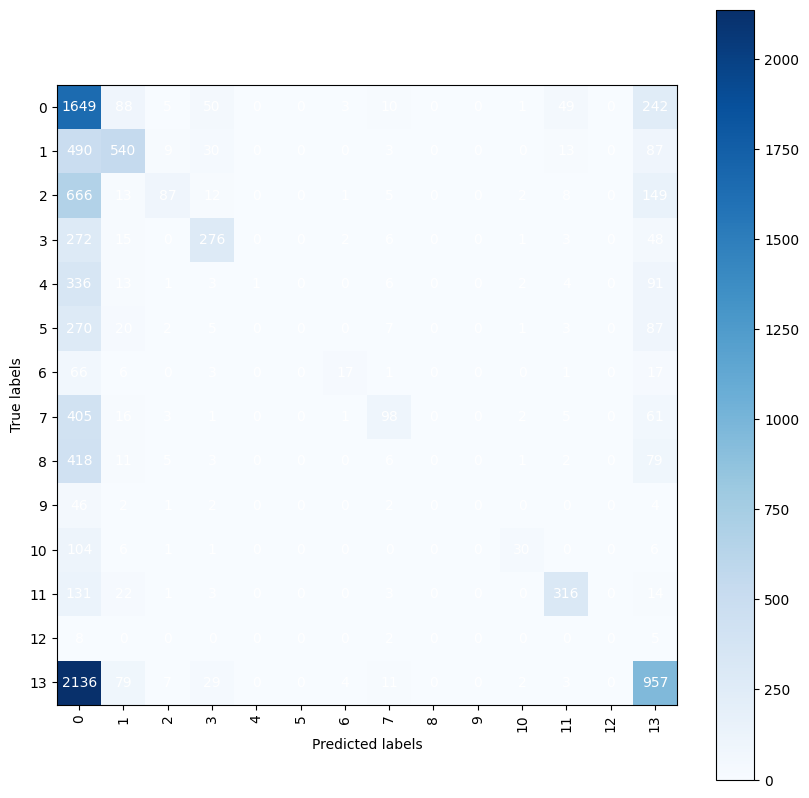

In [36]:
# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()